In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
%matplotlib inline
plt.rcParams.update({'font.size': 20})


In [2]:
data = pd.read_csv('heart_disease.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [4]:
def getMissingCount(data):
    try:
        missingCount = data.isnull().sum() * 100/ len(data)
        return missingCount
    except Exception as exp:
        print(str(exp))

In [5]:
def visualizeMissingValue(data):
    try:
        missingCount = getMissingCount(data)
        print(missingCount)
        
        #Plotting missing count columns as fractions
        plt.figure(figsize=(16, 8))
        plt.xticks(np.arange(len(missingCount)) + 0.5, missingCount.index, rotation='vertical')
        plt.ylabel('fraction of rows with missing data')
        plt.bar(np.arange(len(missingCount)), missingCount)
        plt.show()

        #Plotting missing count columns as color coded graph
        plt.figure(figsize=(15, 20))
        sns.heatmap(pd.DataFrame(data.isnull().sum() / data.shape[0] * 100), annot=True,
        cmap=sns.color_palette("cool"), linewidth=1, linecolor="white")
        plt.title("Heart disease - missing values")
        plt.show()
        
        missingColumn = data.columns[data.isna().any()].tolist()
        print(missingColumn)
        
        #TODO. This code is incomplete
        #msno.matrix(data.loc[:,['PctPrivateCoverageAlone']])
        #msno.bar(data.loc[:,['PctPrivateCoverageAlone']], color="blue", log=False, figsize=(30, 18))
        #msno.heatmap(data[missingColumn], figsize=(20, 20))

    except Exception as exp:
        print(str(exp))

In [ ]:
visualizeMissingValue(data)

In [6]:
data_01 = data.dropna(axis = 0, how ='any') 

In [ ]:
def visualizeCorrelation(data):
        try:
            d1 = data.copy()

            categoricalCols = d1.select_dtypes(include=["category"]).columns 
            categoricalCols = categoricalCols.tolist()
            for i in categoricalCols:
                d1[i] = d1[i].astype('object')
            
            corr = d1.corr()
            g = sns.heatmap(corr, vmax=.9, center=0, square=True, linewidths=.5, 
                            cbar_kws={"shrink": .5}, annot=True, fmt='.1f', cmap='coolwarm')
            sns.despine()
            g.figure.set_size_inches(24, 20)
            plt.show()
        except Exception as exp:
            print(str(exp))  

In [ ]:
data_categorical = data_01[['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']].copy()
data_numerical = data_01[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'glucose']].copy()

In [ ]:

visualizeCorrelation(data_categorical)

In [ ]:
visualizeCorrelation(data_numerical)

In [ ]:
def snsPlotNumeric(data_i):
    try:
        
        d1 = data.copy()
        categoricalCols = d1.select_dtypes(include=["category"]).columns 
        numericCols = d1.select_dtypes(include=["number"]).columns 

        for i in numericCols:
            for j in categoricalCols:
                sns.catplot(x=j, y=i, hue=response,   data=data, kind='bar')
            
        for i in range(len(numericCols)):
            for j in range(len(numericCols)-1):
                sns.scatterplot(data=data, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full")
                plt.show()

        #TODO : Education is a category. Why does the graph not show this ?
        for i in categoricalCols:
            for j in [response]:
                plt.figure(figsize=(15, 7))
                plt.subplot(121)
                graph = sns.countplot(y=data[i],
                                        palette="Set2",
                                        order=data[i].value_counts().index[:100])
                plt.title("Distribution of " + i)

                plt.subplot(122)
                sns.countplot(y=data[i],
                                hue=data[j], palette="Set2",
                                order=data[i].value_counts().index[:100])
                plt.ylabel("")
                plt.title("Distribution of " + i + " by " + j)

                plt.subplots_adjust(wspace=.4)

    except Exception as exp:
        print(str(exp))



In [ ]:
snsPlot(data_01)

In [ ]:
sns.pairplot(data_01)

In [ ]:
data_01.describe()

In [ ]:
def multipleFacets(data):
    #g = sns.FacetGrid(data_01, col="education", hue="glucose")
    g = sns.FacetGrid(data_01, col="education")
    g.map_dataframe(sns.scatterplot, x="glucose", y="heartRate")
    g.set_axis_labels("Glucose", "Heart Rate")
    g.add_legend()

In [ ]:
multipleFacets(data_01)

In [ ]:
def performPCA(data):
    try:
        pca = PCA()
        pcaModel = pca.fit(data)
        pcaTransformed = pd.DataFrame(pcaModel.transform(data), columns=range(data.shape[1]))
        
        for i in range(len(pcaTransformed.columns)):
            pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)        
        
        comp = pd.DataFrame(pcaModel.components_, columns=data.columns)

        return pcaTransformed
    
    except Exception as exp:
        print(str(exp))


In [7]:
targetDF = data_01[['TenYearCHD']]
print(targetDF.info())
uniqueTarget = targetDF['TenYearCHD'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   TenYearCHD  3656 non-null   int64
dtypes: int64(1)
memory usage: 57.1 KB
None


In [8]:
d1 = data_01.drop('TenYearCHD', axis=1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
d2 = scaler.fit_transform(d1)
scaledData = pd.DataFrame(d2, columns=d1.columns)

In [12]:
pca = PCA()

pcaModel = pca.fit(scaledData)
pcaTransformed = pd.DataFrame(pcaModel.transform(scaledData), columns=range(scaledData.shape[1]))
for i in range(len(pcaTransformed.columns)):
    pcaTransformed.rename(columns={i: 'PCA' + str(i)}, inplace=True)

print(pcaTransformed.head())

comp = pd.DataFrame(pcaModel.components_, columns=scaledData.columns)
print(comp)

       PCA0      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0  0.092669 -0.086193 -0.868281  0.636677 -0.194255  0.037603  0.007445   
1 -0.545206 -0.471654 -0.164493 -0.019403 -0.089576  0.014315 -0.009261   
2  0.799802  0.022705 -0.127254 -0.380037  0.010552 -0.017296  0.031086   
3 -0.019101  0.342885  0.907740  0.405880  0.253579 -0.130124 -0.091099   
4  0.274503 -0.555707  0.480372  0.299015  0.064127  0.002662 -0.010294   

       PCA7      PCA8      PCA9     PCA10     PCA11     PCA12     PCA13  \
0  0.012300 -0.110026 -0.047147  0.047146 -0.087810 -0.000231 -0.000425   
1  0.198647 -0.074903 -0.010558  0.068672 -0.038781  0.000888 -0.021004   
2  0.029037  0.018951 -0.011229  0.010305  0.031399 -0.002853 -0.016978   
3 -0.072359  0.102220  0.211211 -0.033680 -0.097743 -0.006833  0.051197   
4  0.147532  0.003397  0.075119  0.010181  0.087008  0.008406  0.012861   

      PCA14  
0  0.017535  
1 -0.012541  
2  0.019931  
3 -0.060449  
4 -0.012079  
        male  

In [15]:
    def drawScreePlot(pca, columns):
        try:
            percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
            # columns = ['PC1', 'PC2', 'PC3', 'PC4']
            plt.figure(figsize=(8, 8))
            plt.bar(x=range(1, len(columns) + 1), height=percent_variance, tick_label=columns)
            plt.ylabel('Percentate of Variance Explained')
            plt.xlabel('Principal Component')
            plt.title('PCA Scree Plot')
            plt.show()
        except Exception as exp:
            print(str(exp))

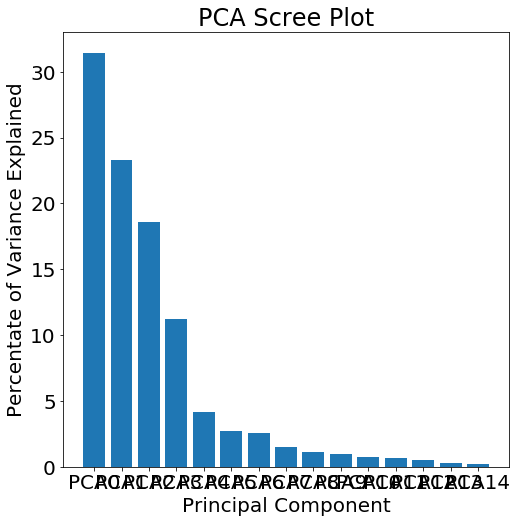

In [26]:
drawScreePlot(pca, pcaTransformed.columns)

In [18]:
    def drawGraph(data, response, uniqueTarget):
        try:

            fig = plt.figure(figsize=(8, 8))
            plt.subplot(121)
            plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha=0.8)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')
            plt.show()

            plt.subplot(122)
            plt.xlabel('PCA0')
            plt.ylabel('PCA1')

            colors = np.random.rand(len(uniqueTarget))

            # for target, color in zip(uniqueTarget, colors):
            for target in (uniqueTarget):
                indicesToKeep = data[response] == target
                plt.scatter(data.loc[indicesToKeep, 'PCA0']
                            , data.loc[indicesToKeep, 'PCA1']
                            # , c=color
                            , s=50)
            plt.legend(uniqueTarget)
            plt.grid()


        except Exception as exp:
            print(str(exp))

In [17]:
pcaTransformedResponse = pd.concat([pcaTransformed, targetDF], axis=1)

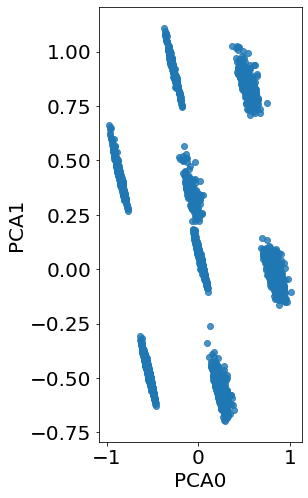

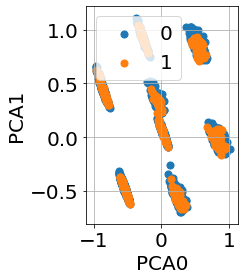

In [27]:
drawGraph(pcaTransformedResponse, 'TenYearCHD', uniqueTarget)

In [ ]:
data_02 = performPCA(data_01)

In [20]:
 def showVariance(pcaModel, pca):
        try:
            print(pcaModel.explained_variance_ratio_)
            print(np.cumsum(pcaModel.explained_variance_ratio_))
            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), pca.explained_variance_ratio_)
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, max(pca.explained_variance_ratio_) + 0.05])
            # plt.xticks(list(range(1, len(pca.explained_variance_ratio_))))
            plt.xlabel('Principal Components')
            plt.ylabel('Variance Explained')
            plt.show()

            plt.figure(figsize=(8, 8))
            plt.plot(list(range(1, len(pca.explained_variance_ratio_) + 1)), np.cumsum(pca.explained_variance_ratio_))
            plt.axis([0, len(pca.explained_variance_ratio_) + 1, 0, 1.1])
            plt.axhline(y=0.95, color='r', linestyle='--', linewidth=1)
            # plt.xticks(list(range(1, 61)))
            plt.xlabel('# of Principal Components')
            plt.ylabel('Cumulative Variance Explained')
            plt.show()

        except Exception as exp:
            print(str(exp))

[0.31455186 0.23304546 0.18607464 0.11195193 0.04164222 0.02696261
 0.02591223 0.01504677 0.01127699 0.00954838 0.00710737 0.00676893
 0.00541935 0.00258908 0.00210216]
[0.31455186 0.54759732 0.73367196 0.84562389 0.88726611 0.91422872
 0.94014096 0.95518773 0.96646472 0.9760131  0.98312047 0.98988941
 0.99530875 0.99789784 1.        ]


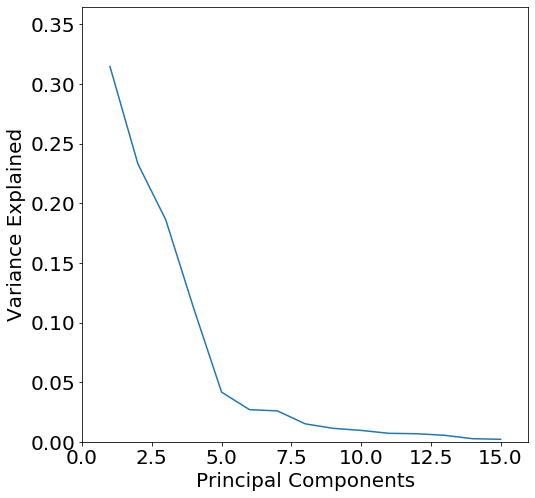

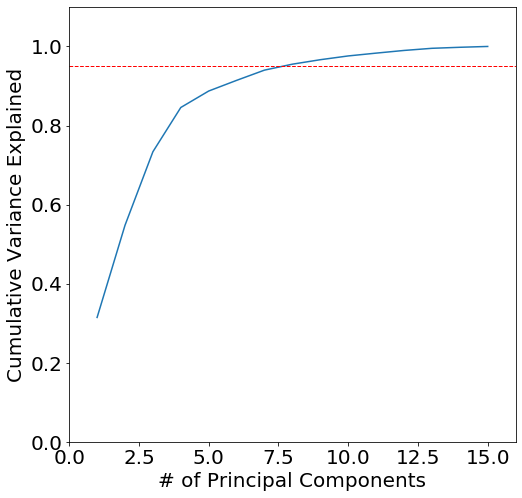

In [28]:
showVariance(pcaModel, pca)

In [ ]:
data_02.describe()

In [ ]:
visualizeCorrelation(data_02)